
# [KDT] ch5 Linear Regression

### 단일회귀 / 다중회귀 / 특성공학
 - 데이터셋: 직장인 연봉 정보 / 보스톤집값 / 공유자전거 플랫폼 / 다이아몬드 
 - 주요 라이브러리: statsmodels ols / sklearn linear_model / sklearn train_test_split / 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [1]:
import os
os.getcwd()

'C:\\Users\\김진산\\Desktop\\AIStudy'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 파일 로딩 
df_hk = pd.read_csv('c:ktd_2_data230224/hk_221206.csv')

In [5]:
df_hk

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


## $\alpha$(알파) 퀴즈:
전체 소득 대비 소비액 비율을 나타내는 합성 변수('expenditure_per_salary')를 만들고자 한다. 
<br> 수식 : expenditure_per_salary = expenditure / salary 
<br> expenditure_per_salary 합성변수를 만들고 해당 변수의 Company 그룹별 평균을 구하시오 

In [6]:
df = df_hk.copy()

In [7]:
 df['expenditure_per_salary'] = df['expenditure'] / df['salary']
df.groupby('company')['expenditure_per_salary'].mean()

company
A    0.765371
B    0.751797
C    0.790910
Name: expenditure_per_salary, dtype: float64


## 1-1. 단일 회귀 statemodels - ols()

연봉으로 지출액을 예측할 수 있을까 ?

In [8]:
# statemodels - ols() 클래스 호출
from statsmodels.formula.api import ols  # formula 형식
from statsmodels.formula.api import ols

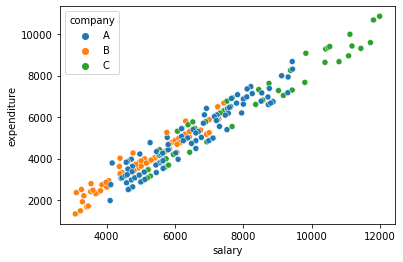

In [9]:
# 시각화 (x="salary", y="expenditure")
sns.scatterplot( x="salary", y="expenditure", data = df, hue= 'company')
plt.show()

In [10]:
# 독립변수, 종속변수 상관계수 확인
df[['expenditure','salary']].corr()

# 상관계수가 5보다 크면 강한 상관관계

,expenditure,salary
expenditure,1.000000,0.972185
salary,0.972185,1.000000


In [11]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit
from statsmodels.formula.api import ols
model1_1 = ols(formula='expenditure~salary', data=df).fit()

In [12]:
# Attribute 확인
model1_1.resid

0     -788.360395
1     -399.803932
2       31.171143
3      210.764994
4      967.980531
          ...    
245   -725.169784
246   -722.545952
247     46.914133
248     63.531733
249     35.325543
Length: 250, dtype: float64

In [13]:
# 모델 summary 결정계수 / 회귀 계수(coef) 등 확인 
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4273.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.40e-158
Time:                        09:42:44   Log-Likelihood:                -1873.6
No. Observations:                 250   AIC:                             3751.
Df Residuals:                     248   BIC:                             3758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1246.9920     99.061    -12.588      0.000   -1442.100   -1051.884
salary         0.9781      0.015     65.367      0.000       0.949       1.008
==============================================================================
Omnibus:                        9.379   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.059
Skew:                          -0.130   Prob(JB):                       0.0797
Kurtosis:                       2.354   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9781 \times x - 1246.9920$$

In [14]:
# model1_1 attributes (params, predict, resid 잔차)
model1_1.params, model1_1.params[0],model1_1.params[1]# 파라메타, 
model1_1.resid[1]# 잔차

-399.80393170414754

In [15]:
# 회귀식
def liner1_1(x):
    return (model1_1.params[1] * x + model1_1.params[0])

In [16]:
# sample data
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237


In [17]:
# 회귀식으로 예측값 확인
liner1_1(4100)

2763.3603950848137

In [18]:
# sample data
df[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0.811126
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,0.722906
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,0.914579


In [19]:
# predict로 예측값 확인
predict1_1 = model1_1.predict(exog=df['salary'])

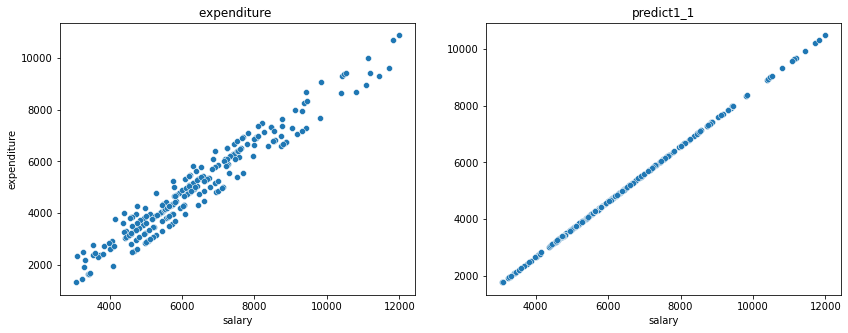

In [20]:
# 시각화 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot(x=df['salary'], y=df['expenditure'], palette='Set1', ax= ax[0] )
sns.scatterplot(x=df['salary'], y=predict1_1, palette='Set2', ax=ax[1] )

ax[0].set_title('expenditure ')
ax[1].set_title('predict1_1')
plt.show()

## 다중 회귀 가정 4가지 선형성, 정규성, 등분산, 독립성

### 선형 회귀 가정 1: 선형성 

F 검정의 pvalue로 확인

<AxesSubplot:xlabel='salary'>

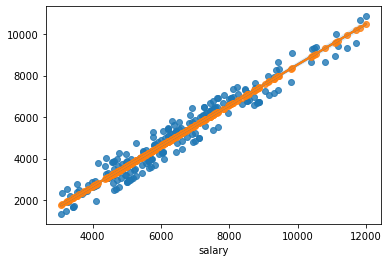

In [21]:
# 선형회귀 그래프, regplot: scatter plot, regression line, confidence band를 한 번에 그리는 기능
sns.regplot(x='salary', y='expenditure', data=df)
sns.regplot(x=df['salary'], y=predict1_1)

In [22]:
# F 검정의 pvalue로 확인
model1_1.f_pvalue < 0.05

True

### 선형 회귀 가정 2: 잔차의 정규성

<br>잔차 그래프로 확인
<br>shapiro 의 경우 p값이 0.05 이상이면 정규성 만족한다 

In [23]:
# 잔차 계산
residual = df['expenditure'] - predict1_1
residual

0     -788.360395
1     -399.803932
2       31.171143
3      210.764994
4      967.980531
          ...    
245   -725.169784
246   -722.545952
247     46.914133
248     63.531733
249     35.325543
Length: 250, dtype: float64

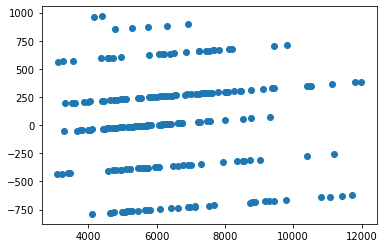

In [24]:
# 잔차 그래프 1
plt.scatter(df['salary'], residual)
plt.show()

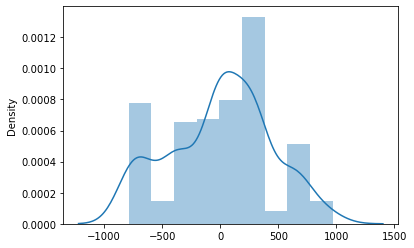

In [25]:
# 잔차 그래프 2
sns.distplot(residual)
plt.show()

In [26]:
# shapiro 정규성 검정, Ho: 정규성을 가진다 (p-value > 0.05)
from scipy.stats import shapiro
shapiro(residual)

ShapiroResult(statistic=0.9549192190170288, pvalue=5.075828539702343e-07)

In [27]:
# pvalue가 0.05보다 작으면 정규성 만족 못함
shapiro(residual)[1] > 0.05

False

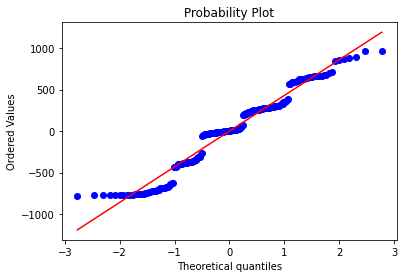

In [28]:
# residual이 그룹화 되어 있어 shapiro test에서 정규성이 안 나옴

import scipy.stats as stats

stats.probplot(residual, plot=plt)
plt.show()

## 선형 회귀 가정 3: 잔차의 등분산

예측값과 잔차의 산점도로 파악

<AxesSubplot:>

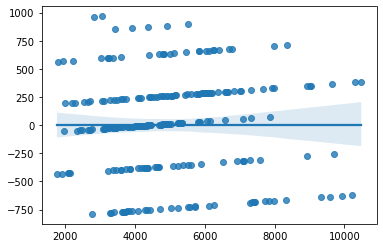

In [29]:
# 잔차그래프로 확인, X가 커질때 잔차의 간격이 변하면 안됨, 간격아 일정하면 등분산성 만족
sns.regplot(x=predict1_1, y=residual)

## 선형 회귀 가정 4: 잔차의 독립성
잔차가 독립인지(자기상관성이 있는지) 검정

In [30]:
#perform Durbin-Watson test

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model1_1.resid)

# 더빈 왓슨 통계량은 0 ~ 4사이의 값을 갖을 수 있음
# 0에 가까울수록 → 양의 상관관계
# 4에 가까울수록 → 음의 상관관계
# 2에 가까울수록 → 오차항의 자기상관이 없음

1.840170797849197

## 1-2. 단일 회귀 sklearn.linear_model

연봉으로 지출액을 예측할 수 있을까 ?

In [31]:
# LinearRegression 호출
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [32]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit 
model1_2 = LinearRegression(fit_intercept=True,).fit(X=df[['salary']],y=  df['expenditure'])
model1_2

LinearRegression()

In [33]:
# 회귀계수 확인
model1_2.coef_

array([0.97813474])

In [34]:
# intercept_ 확인
model1_2.intercept_

-1246.9920244946543

## $$y= 0.97813 \times x - 1246.9920$$

In [35]:
# 회귀식
def liner1_2(x):
    return (model1_2.coef_[0] * x) + model1_2.intercept_

In [36]:
# sample data
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237


In [37]:
# 회귀식으로 예측
liner1_2(4100)

2763.360395084815

In [38]:
# predict로 예측
predict1_2 = model1_2.predict(df[['salary']])
predict1_2

array([ 2763.36039508,  3369.8039317 ,  5873.8288571 ,  2724.23500563,
        3047.01946866,  1971.07125853,  2421.01323732,  1765.66296387,
        1795.00700597,  1912.38317434,  2088.44742691,  2098.22877428,
        3467.61740535,  2137.35416374,  3027.45677394,  1941.72721644,
        2215.60494265,  2704.6723109 ,  3868.65264731,  3242.64641596,
        3379.58527907,  3594.7749211 ,  3105.70755285,  3721.93243684,
        4289.250584  ,  4680.50447859,  4748.97391014,  4670.72313123,
        4866.35007852,  4338.15732082,  4827.22468906,  5521.70035197,
        5599.95113088,  6010.76772021,  3633.90031055,  5599.95113088,
        5844.48481501,  6010.76772021,  6049.89310967,  5844.48481501,
        6020.54906757,  5052.19567845,  7028.02784615,  2724.23500563,
        2205.82359529,  3712.15108947,  2352.54380576,  2528.60805833,
        3232.8650686 ,  2665.54692144,  3565.430879  ,  3105.70755285,
        3751.27647893,  4025.15420515,  4074.06094197,  4543.56561548,
      

<AxesSubplot:xlabel='salary'>

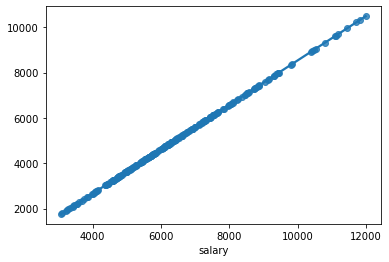

In [39]:
# 선형회귀 그래프
sns.regplot(x=df['salary'], y=predict1_2)


## statemodels vs. sklearn 비교 
 - statemodels는 통계기반 강점, summary 표등 통계자료 보기 편함 
 - sklearn는 머신러닝 관점
 - 입력값의 차이( statemodels ols의 경우 formula 문법이 있음 / sklearn는 fit() 활용) 

In [40]:
# statemodels vs. sklearn 제공 기능 비교

# model1_1.   # 통계 중심
# model1_2.   # 머신러닝 중심

## 1-3. 단일 회귀 train_test_split / statemodels - ols()

train, test data 분할 (train_size= 0.7, random_state=123)
<br> 연봉으로 지출액을 예측할 수 있을까 ?

In [41]:
# train_test_split (train_size= 0.7, random_state=123)
from sklearn.model_selection import train_test_split
df_train1, df_test1 = train_test_split(df, train_size=0.7,random_state=123)
print('데이터셋 총합 :', len(df), ', df_train :', len(df_train1), ', df_test :', len(df_test1))


데이터셋 총합 : 250 , df_train : 175 , df_test : 75


In [42]:
# ols 모델링, fit
from statsmodels.formula.api import ols
model1_3 = ols(formula='expenditure~salary',data=df_train1).fit()
model1_3

In [43]:
model1_3.params[1]

0.9798798350635078

In [44]:
# summary, 회귀계수 확인
model1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3453.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          3.14e-116
Time:                        09:42:46   Log-Likelihood:                -1306.3
No. Observations:                 175   AIC:                             2617.
Df Residuals:                     173   BIC:                             2623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1278.0961    110.539    -11.562      0.000   -1496.275   -1059.917
salary         0.9799      0.017     58.760      0.000       0.947       1.013
==============================================================================
Omnibus:                        5.448   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.336
Skew:                          -0.140   Prob(JB):                        0.189
Kurtosis:                       2.385   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9799 \times x - 1278.0961$$

In [45]:
# model1_3 과 model1_1.summary()와 비교, coef_, R-squared, train data set이 바뀌었음


In [46]:
df_test1[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
127,hkd213,910216-2,F,158.3,30,B,C,C,7520,6770,0.900266
187,hkd42,840718-1,M,191.5,37,O,A,B,5620,3870,0.688612


In [47]:
# 회귀식 y = 0.9799 * salary - 1278.0961

model1_3.params[1] * 7520 + model1_3.params[0]
# 0.9799 * 5620 - 1278.0961

6090.600256122474

In [48]:
# predict로 예측
model1_3.predict(df_test1[['salary']])

127    6090.600256
187    4228.828570
24     4268.023763
206    2798.204010
235    4258.224965
          ...     
128    5512.471153
132    7119.474083
167    5355.690380
217    3258.747533
50     3542.912685
Length: 75, dtype: float64

## 1-4. $\pi$(파이) Quiz 단일회귀 train_test_split / statemodels - ols() 


<br>나이로 연봉을 예측할 수 있을까 ? 
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

<br>1. train, test data 분할하시오(train_size= 0.7, random_state=123)
<br>2. 회귀식을 수립하시오
<br>3. 37세의 연봉을 예측하시오

In [49]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

In [50]:
# ols모델링, fit
from statsmodels.formula.api import ols
model1_4 = ols(formula='salary~age',data=df_train1).fit()
model1_4

In [51]:
model1_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        09:42:46   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model1_4.predict(df_test1[['salary']])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'age' is not defined
    salary~age
           ^^^

In [53]:
# summary, 회귀계수 확인
model1_4.params[1] * 37 + model1_4.params[0]
pd.DataFrame(model1_4.params[1] * df['age'] + model1_4.params[0])

,age
0,4357.076095
1,5394.394553
2,8160.577107
3,5048.621734
4,5163.879340
...,...
245,7584.289075
246,7699.546681
247,7814.804288
248,7930.061894


## $$y= 115.2576 \times x + 1821.4088$$

In [54]:
# 회귀식으로 예측 y = 115.2576 * age + 1821.4088
115.2576 * ? + 1821.4088
115.2576 * ? + 1821.4088

SyntaxError: invalid syntax (CreatorTemp/ipykernel_18328/2544252172.py, line 2)

In [55]:
# predict 개별값 입력으로 예측
model1_4.predict(exog=pd.DataFrame([37], columns=['age']))

0    6085.940191
dtype: float64

In [56]:
# predict 전체값 예측
model1_4.predict(exog=df_train1[['age']])

193    6777.485830
243    7353.773862
152    5855.424979
184    4702.848915
190    6431.713011
          ...     
98     5855.424979
220    7699.546681
66     5394.394553
126    5163.879340
109    6201.197798
Length: 175, dtype: float64

<AxesSubplot:xlabel='age', ylabel='salary'>

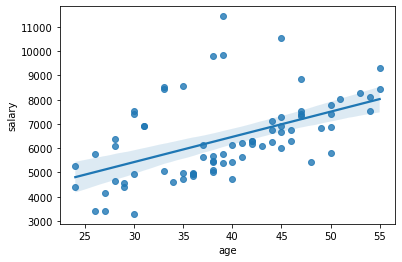

In [57]:
# 선형회귀 그래프
sns.regplot(x='age', y='salary', data=df_test1)

## 1-5.  $\pi$(파이) Quiz 단일회귀 train_test_split /  sklearn.linear_model


<br>나이로 연봉을 예측할 수 있을까 ?  
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

train, test data 분할하고 37세의 연봉을 예측하시오

In [58]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

In [59]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model1_5 = LinearRegression(fit_intercept=True,).fit(X=df_train1[['age']],y=  df_train1['salary'])
model1_5.predict( X = pd.DataFrame(data=[37], columns=['age']))
predict1_5 = model1_5.predict( X = df_test1[['age']])
predict1_5[:2]

array([5279.13694659, 6085.94019144])

In [60]:
def linear2(x):
    return (model1_5.coef_ * x) + model1_5.intercept_

In [61]:
linear2(37)

array([6085.94019144])

## 1-6. 단일회귀 train_test_split /  statsmodels.api 

In [62]:
# statsmodels.api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# train, fit
model_sm = sm.OLS(endog= df_train1['salary'], exog=sm.add_constant(df_train1[['age']])).fit() #intercept 포함 상수항
# model_sm = sm.OLS(endog= df_train1['salary'], exog=sm.add_constant(df_train1[['age']])).fit(
model_sm

In [63]:
# predict
model_sm.predict(sm.add_constant(df_test1[['age']]))

127    5279.136947
187    6085.940191
24     6201.197798
206    4933.364127
235    6546.970617
          ...     
128    5394.394553
132    5855.424979
167    7123.258649
217    5048.621734
50     5970.682585
Length: 75, dtype: float64

In [64]:
# summary()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        09:43:22   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model2_1.params

NameError: name 'model2_1' is not defined

## 2-1. 다중회귀 statemodels -ols()

연봉과 나이로 지출액을 예측할 수 있을까
<br> train, test data 분할
<br> 종속변수 : 지출액 (expenditure)
<br> 독립변수 : 연봉과 나이 (age , salary)

In [ ]:
# ols 다중회귀 모델링, fit
from sklearn.linear_model import LinearRegression
#ormula='expenditure~age + salary'

model2_1 = ols(formula='expenditure~age + salary', data=df_train1).fit()
model2_1

In [66]:
# summary
model2_1.summary()

NameError: name 'model2_1' is not defined

In [67]:
# attribute 확인
model2_1.params

NameError: name 'model2_1' is not defined

## $$y= 14.9256 \times x_1  + 0.9436 \times x_2 - 1633.1811$$

In [68]:
df_test1.head(1)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
127,hkd213,910216-2,F,158.3,30,B,C,C,7520,6770,0.900266


In [69]:
# 회귀식, hkd213에 대입 나이 30 / 연봉 7520
14.925566 * 30 + 0.9436 * 7520 - 1633.1811

5910.457880000001

In [70]:
# predict 예측
predict2_1 = model2_1.predict(exog=df_test1[['age','salary']])
predict2_1[:5]

NameError: name 'model2_1' is not defined

In [71]:
# attribute로 확인
model2_1.params, model2_1.params[0],model2_1.params[1],model2_1.params[2]

NameError: name 'model2_1' is not defined

In [72]:
# 회귀식에 attribute값 대입, (나이 30 / 연봉 7520)
model2_1.params[1] * 30 + model2_1.params[2] * 7520 + model2_1.params[0]

NameError: name 'model2_1' is not defined

## 다중회귀 2-2 sklearn.linear_model 

<br> 연봉과 지출액으로 나이를 예측할 수 있을까
<br> train, test data 분할
<br> 독립변수: salary, expenditure
<br> 종속변수: age

In [73]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model2_2 = LinearRegression().fit(X=df_train1[['salary','expenditure']], y=df_train1['age'])
model2_2

predict2_2 = model2_2.predict(X=df_test1[['salary','expenditure']])
predict2_2[:5]

array([45.29627698, 35.77791435, 37.64667625, 38.56708813, 34.08616908])

In [74]:
# intercept_, coef_확인
model2_2.intercept_ ,model2_2.coef_

(29.814852038392157, array([-0.00218482,  0.00471363]))

In [75]:
# 변수별 회귀계수 확인하는 데이터프레임
pd.DataFrame({'feature':['salart','expenditure'], 'coef':model2_2.coef_})

,feature,coef
0,salart,-0.002185
1,expenditure,0.004714


## 2-3 선형회귀 모형 명목형 변수의 처리
get_dummy ('gender', 'blood_type', 'company', 'grades')

In [76]:
# 해당 column만 get_dummies
df[['gender', 'blood_type', 'company', 'grades']]

,gender,blood_type,company,grades
0,F,A,A,A
1,F,A,A,B
2,F,A,A,B
3,F,AB,B,B
4,M,O,B,F
...,...,...,...,...
245,F,A,A,A
246,F,O,A,A
247,M,A,A,B
248,M,O,A,B


In [77]:
# 전체 column + 해당 column, 원본 column은 삭제됨
pd.get_dummies(data=df, columns=['gender', 'company'], drop_first=True) # 사전순서대로 정렬된다.

,name,jumin7,height,age,blood_type,grades,salary,expenditure,expenditure_per_salary,gender_M,company_B,company_C
0,hkd1,990623-2,161.9,22,A,A,4100,1975,0.481707,0,0,0
1,hkd10,900303-2,169.4,31,A,B,4720,2970,0.629237,0,0,0
2,hkd100,681205-2,168.3,55,A,B,7280,5905,0.811126,0,0,0
3,hkd101,931226-2,155.3,28,AB,B,4060,2935,0.722906,0,1,0
4,hkd102,920123-1,188.6,29,O,F,4390,4015,0.914579,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,157.8,50,A,A,6990,4865,0.695994,0,0,0
246,hkd96,720805-2,150.4,51,O,A,7110,4985,0.701125,0,0,0
247,hkd97,710929-1,172.4,52,A,B,8000,6625,0.828125,1,0,0
248,hkd98,701024-1,166.7,53,O,B,8760,7385,0.843037,1,0,0


In [82]:
df_dummy = pd.get_dummies(data=df,columns=['gender','company']) # 사전순서대로 정렬된다.
df_dummy

,name,jumin7,height,age,blood_type,grades,salary,expenditure,expenditure_per_salary,gender_F,gender_M,company_A,company_B,company_C
0,hkd1,990623-2,161.9,22,A,A,4100,1975,0.481707,1,0,1,0,0
1,hkd10,900303-2,169.4,31,A,B,4720,2970,0.629237,1,0,1,0,0
2,hkd100,681205-2,168.3,55,A,B,7280,5905,0.811126,1,0,1,0,0
3,hkd101,931226-2,155.3,28,AB,B,4060,2935,0.722906,1,0,0,1,0
4,hkd102,920123-1,188.6,29,O,F,4390,4015,0.914579,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,157.8,50,A,A,6990,4865,0.695994,1,0,1,0,0
246,hkd96,720805-2,150.4,51,O,A,7110,4985,0.701125,1,0,1,0,0
247,hkd97,710929-1,172.4,52,A,B,8000,6625,0.828125,0,1,1,0,0
248,hkd98,701024-1,166.7,53,O,B,8760,7385,0.843037,0,1,1,0,0


## 2-4 다중회귀 sklearn.linear_model 

회사와(company, 범주형) 연봉(salary, 연속형)으로 지출액(expenditure)을 예측할 수 있을까 ?

In [84]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

model2_4 = LinearRegression().fit(X=df_dummy[['company_A','company_B','company_C','salary']],
                      y=df_dummy['expenditure'])
model2_4
predict2_4 = model2_4.predict(X=df_dummy[['company_A','company_B','company_C','salary']])
predict2_4

array([ 2622.85611109,  3251.40274107,  5846.69205195,  2790.76899332,
        3125.31800605,  2010.15463028,  2476.49567833,  1797.25980399,
        1827.67335061,  1949.32753705,  2131.80881672,  2141.9466656 ,
        3352.78122978,  2182.49806108,  3105.0423083 ,  1979.74108367,
        2263.60085204,  2770.49329557,  3976.89731118,  3328.07498346,
        3470.00486765,  3693.0375428 ,  3186.14509927,  3616.36530041,
        4412.82481262,  4818.33876744,  4889.30370954,  4808.20091857,
        5010.95789598,  4463.51405697,  4970.4065005 ,  5690.19377031,
        5771.29656128,  6197.08621385,  3525.12466058,  5771.29656128,
        6024.74278305,  6197.08621385,  6237.63760933,  6024.74278305,
        6207.22406272,  5203.57702452,  7251.42249639,  2790.76899332,
        2253.46300317,  3606.22745154,  2405.53073623,  2588.0120159 ,
        3317.93713459,  2729.94190009,  3662.62399619,  3186.14509927,
        3855.24312473,  4139.10289311,  4189.79213746,  4676.40888325,
      

In [88]:
# attribute 확인(coef, intercept)
model2_4.coef_, model2_4.intercept_

(array([ -30.55321087,  177.91106684, -147.35785597,    1.01378489]),
 -1503.108714996708)

In [90]:
# feature, coef DataFrame화
pd.DataFrame({'feature':['company_A','company_B','company_C','salary'] , 'coef_':model2_4.coef_})

,feature,coef_
0,company_A,-30.553211
1,company_B,177.911067
2,company_C,-147.357856
3,salary,1.013785


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "sklearn" - maybe you meant "search"



## $$y= -30.55 \times x_1  + 177.91 \times x_2 -147.36 \times x_3 + 1.01 \times x_4 - 1503.1087$$

## 3-1 선형회귀 모델의 평가

MSE, RMSE, MAE, RMAE

In [95]:
# df_train1, df_test1
df_train1[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
193,hkd48,780113-1,M,184.0,43,AB,A,C,6530,5405,0.827718
243,hkd93,730719-1,M,180.4,48,AB,A,B,7560,6185,0.818122


<AxesSubplot:xlabel='salary', ylabel='expenditure'>

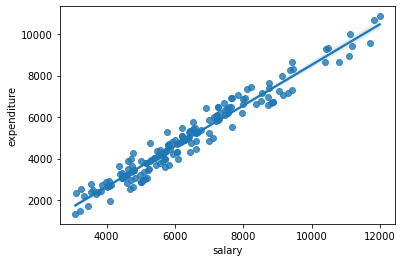

In [96]:
# 평가를 위한 시각화 (x='salary', y='expenditure')
sns.regplot(x='salary', y='expenditure', data=df_train1) # 평가는 회귀식과 실제값이 잘 맞는가

<AxesSubplot:xlabel='age', ylabel='expenditure'>

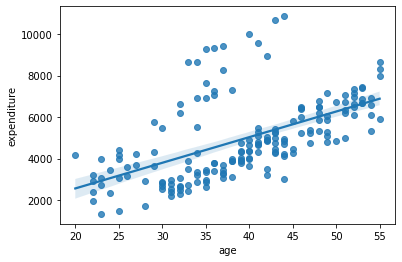

In [97]:
# 평가를 위한 시각화 (x='age', y='expenditure')
sns.regplot(x='age', y='expenditure', data=df_train1)  # 그래프로 보면 age가 불리해 보임

In [103]:
# LinearRegression (salary, expenditure)
from sklearn.linear_model import LinearRegression
model_salary = LinearRegression().fit(X = df_train1[['salary']], 
                                      y = df_train1['expenditure'])
predict_salary = model_salary.predict(X = df_test1[['salary']])


In [104]:
# LinearRegression (age, expenditure)
from sklearn.linear_model import LinearRegression
model_age = LinearRegression().fit(X = df_train1[['age']], 
                                y = df_train1['expenditure'])
predict_age = model_age.predict(X = df_test1[['age']])

<AxesSubplot:ylabel='expenditure'>

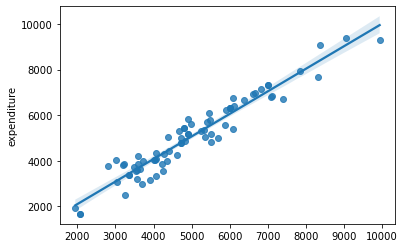

In [105]:
# predict_salary 시각화
sns.regplot(x=predict_salary, y=df_test1['expenditure'])

<AxesSubplot:ylabel='expenditure'>

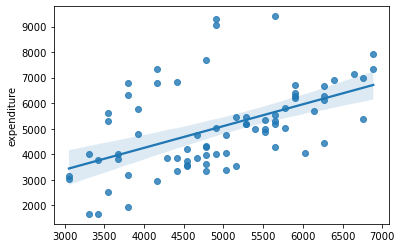

In [106]:
# predict_age 시각화
sns.regplot(x=predict_age, y=df_test1['expenditure'])

In [108]:
# LinearRegression 평가를 위한 class
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Mean Absolute Error(MAE) : $$\frac{1}{N}\sum_{i=1}^{n}|x_i-y_i|$$

In [110]:
# Mean Absolute Error(MAE) 계산식
(df_test1['expenditure'] - predict_salary).abs().sum()

28265.23835022241

In [111]:
# mean_absolute_error class 활용 (predict_salary)
len(df_test1), df_test1.shape[0]

(75, (75, 11))

In [114]:
# mean_absolute_error class 활용 (predict_age)
mean_absolute_error(y_true=df_test1['expenditure'],
                   y_pred= predict_salary)

376.86984466963213

In [115]:
mean_absolute_error(y_true=df_test1['expenditure'],
                   y_pred= predict_age)

1037.0895563016563

### Mean Squared Error(MSE): $$\frac{1}{N}\sum_{i=1}^{n}(x_i-y_i)^2$$

In [120]:
# Mean Squared Error(MSE) 계산식
((df_test1['expenditure'] - predict_salary)**2).sum()/len(df_test1)

216029.47590795337

In [121]:
# mean_squared_error  class 활용 (predict_salary)
mean_squared_error(y_true=df_test1['expenditure'],
                   y_pred= predict_salary)

216029.47590795337

In [122]:
# mean_squared_error  class 활용 (predict_age)
mean_squared_error(y_true=df_test1['expenditure'],
                   y_pred= predict_age)

2066567.1581136591

### Root Mean Squared Error(RMSE):
$$\sqrt{\frac{1}{N}\sum_{i=1}^{n}(x_i-y_i)^2 }$$

In [124]:
# Root Mean Squared Error(RMSE) 계산식
mean_squared_error(y_true=df_test1['expenditure'],
                   y_pred= predict_salary)**0.5

464.7897114910714

In [125]:
(((df_test1['expenditure'] - predict_salary)**2).sum()/len(df_test1))**0.5

464.7897114910714

In [ ]:
# RMSE (mean_squared_error 활용) (predict_salary)


In [126]:
# RMSE (mean_squared_error 활용) (predict_age)
mean_squared_error(y_true=df_test1['expenditure'],
                   y_pred= predict_age)**0.5

1437.555966950038

## 3-2 정규화, 표준화 

표준화 : min-max 단위를 고르게 하기 위하여 모든 값을 0~1사이로 바꾸는 것 
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Y = \frac{( X - X_{min} )}{( X_{max} - X_{min} )} $$

In [129]:
# MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

In [128]:
# 대상변수 선택 (수치형) 'height', 'age', 'salary', 'expenditure'
df_n = df[['height','age','salary','expenditure']]
df_n[:2]

,height,age,salary,expenditure
0,161.9,22,4100,1975
1,169.4,31,4720,2970


In [132]:
# MinMaxScaler 모델링
sc_minmax = MinMaxScaler().fit(df_n)


MinMaxScaler()

In [136]:
# MinMaxScaler fit, transform
sc_minmax.transform(df_n)

# sc_minmax df화
df_minmax = pd.DataFrame(sc_minmax.transform(df_n),columns=df_n.columns)

In [137]:
df_minmax[:5]

,height,age,salary,expenditure
0,0.315789,0.057143,0.114478,0.067646
1,0.487414,0.314286,0.184063,0.171998
2,0.462243,1.000000,0.471380,0.479811
3,0.164760,0.228571,0.109989,0.168327
4,0.926773,0.257143,0.147026,0.281594


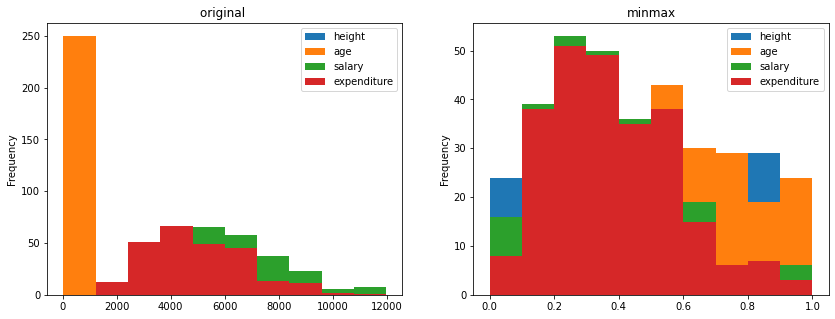

In [138]:
# 시각화 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('original ')
ax[1].set_title('minmax')

df_n.plot.hist(ax= ax[0] )
df_minmax.plot.hist(ax= ax[1] )
plt.show()

### 정규화

정규화: StandardScaler 모든 변수의 값을 평균이 0이고 분산이 1인 정규 분포로 변환
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Z = \frac{ X - \mu }{\sigma} $$

In [139]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler

In [140]:
# StandardScaler 모델링
sc_stand = StandardScaler()

In [142]:
# StandardScaler fit, transform
sc_stand.fit_transform(df_n)
sc_stand

StandardScaler()

In [143]:
df_stand = pd.DataFrame(sc_stand.fit_transform(df_n), columns=df_n.columns)
df_stand

,height,age,salary,expenditure
0,-0.625584,-1.996162,-1.222845,-1.613278
1,-0.013802,-0.954082,-0.887000,-1.077579
2,-0.103530,1.824798,0.499716,0.502599
3,-1.163952,-1.301442,-1.244513,-1.096422
4,1.552361,-1.185655,-1.065756,-0.514960
...,...,...,...,...
245,-0.960025,1.245864,0.342627,-0.057328
246,-1.563650,1.361651,0.407630,0.007279
247,0.230911,1.477438,0.889730,0.890240
248,-0.234043,1.593224,1.301411,1.299417


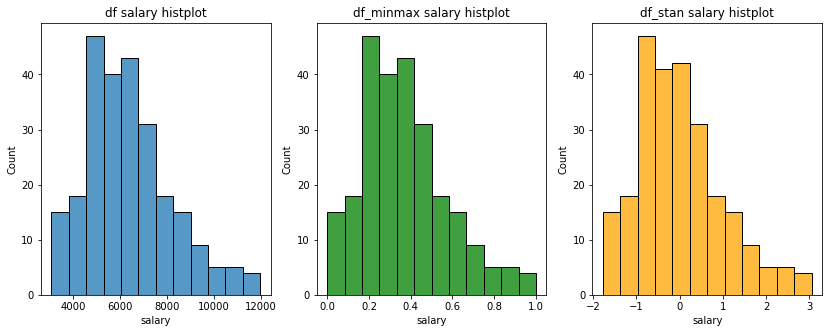

In [145]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(14, 5))

sns.histplot(x='salary', data=df, ax= ax[0])
sns.histplot(x='salary', data=df_minmax, ax= ax[1], color='green')
sns.histplot(x='salary', data=df_stand, ax= ax[2], color='orange')

ax[0].set_title('df salary histplot')
ax[1].set_title('df_minmax salary histplot')
ax[2].set_title('df_stan salary histplot')
plt.show()

In [ ]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler`

In [ ]:
# StandardScaler 모델링


In [ ]:
# StandardScaler fit, transform


### 정규화, train, test분리시 적용

- train으로 정규화 모델을 만들었을때
- test도 train 정규화 모델을 사용해야 같은 scale로 scaling된다

In [147]:
# train_test_split
from sklearn.model_selection import train_test_split


TypeError: train_test_split() got an unexpected keyword argument 'random_stat'

In [148]:
# 연속형 변수 추출
df_n1 = df_train1[['height','age','salary','expenditure']]
df_n1

,height,age,salary,expenditure
193,184.0,43,6530,5405
243,180.4,48,7560,6185
152,166.2,35,10410,9285
184,177.6,25,4450,3075
190,182.1,40,5800,4675
...,...,...,...,...
98,164.1,35,4710,3335
220,183.2,51,8860,6735
66,170.1,31,3330,2205
126,158.3,29,6520,5770


In [150]:
# train data StandardScaler fit까지로 StandardScaler를 만든다
from sklearn.preprocessing import StandardScaler
sc_stan1 = StandardScaler().fit(df_n1)
sc_stan1

StandardScaler()

In [154]:
# train에 대해 transform을 실행하여 train data를 StandardScaling
sc_train_tr = sc_stan1.transform(df_n1)
sc_train_tr[:5]

array([[ 1.18368864,  0.4262369 ,  0.09722408,  0.2420165 ],
       [ 0.89198004,  0.99132369,  0.63216424,  0.64545122],
       [-0.25864828, -0.47790198,  2.11233847,  2.24884563],
       [ 0.66509559, -1.60807557, -0.98304343, -0.96311543],
       [ 1.02973132,  0.08718482, -0.28190827, -0.13555702]])

In [155]:
df_n2 = df_test1[['height','age','salary','expenditure']]
df_n2[:5]

,height,age,salary,expenditure
127,158.3,30,7520,6770
187,191.5,37,5620,3870
24,183.8,38,5660,4285
206,156.3,27,4160,3785
235,151.3,41,5650,3525


In [159]:
# test data는 traind의 StandardScaler를 적용해 transform
sc_train_te = sc_stan1.transform(df_n2)
sc_train_te[:2]

array([[-0.89878658, -1.04298877,  0.61138986,  0.94802726],
       [ 1.79141487, -0.25186726, -0.37539296, -0.55192234]])

In [165]:
# train data df화
df_train_std = pd.DataFrame(sc_train_tr,columns=df_n1.columns)
df_train_std[:3]

,height,age,salary,expenditure
0,1.183689,0.426237,0.097224,0.242016
1,0.891980,0.991324,0.632164,0.645451
2,-0.258648,-0.477902,2.112338,2.248846


In [166]:
# test data df화
df_test_std = pd.DataFrame(sc_train_te, columns=df_n2.columns)
df_test_std[:3]

,height,age,salary,expenditure
0,-0.898787,-1.042989,0.611390,0.948027
1,1.791415,-0.251867,-0.375393,-0.551922
2,1.167483,-0.138850,-0.354619,-0.337274


In [169]:
# train data EDA
df_train_std.describe().round(2)

,height,age,salary,expenditure
count,175.00,175.00,175.00,175.00
mean,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.73,-2.17,-1.69,-1.87
25%,-0.87,-0.70,-0.71,-0.78
50%,-0.08,0.09,-0.15,-0.13
75%,0.89,0.77,0.57,0.69
max,1.82,1.78,2.93,3.07


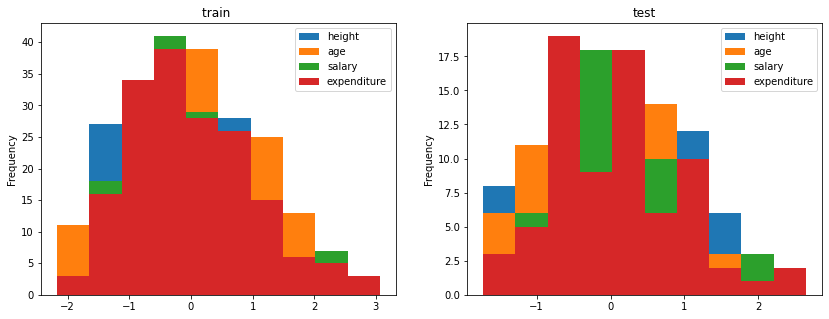

In [170]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('train ')
ax[1].set_title('test')

df_train_std.plot.hist(ax= ax[0] )
df_test_std.plot.hist(ax= ax[1] )
plt.show()

## 4-1 Feature Engeering

변수 선택

- 종속변수(expenditure)

- 독립변수 수치형 변수중 회귀계수가 높은 2개 선정 (feature selection) 하시오
- 독립변수 수치형 변수중 t검정 통계량의 p-value가 0.05이하인것을 선정하시오


In [183]:
# ols 방식
#종속변수: 소비액 / 독립변수: 신장 / 나이 / 연봉 
from statsmodels.formula.api import ols
model_feature1 = ols(formula='expenditure ~ height + age + salary',data = df).fit()
model_feature1.summary()
# LinearRegression 방식
from sklearn.linear_model import LinearRegression
model_feature2 = LinearRegression().fit(X=df[['height','age','salary']],
                      y=df['expenditure'])
model_feature2.coef_


array([-0.021977  , 12.58979578,  0.94721785])

## 4-2 Feature Engeering

보스톤 집값 데이터 셋(출처: sklearn 라이브러리) 

데이터(sklearn_boston.csv) 사이즈 : 506 X 14
<br> 
<br> <b>crim:</b> 자치시 별 1인당 범죄율
<br> <b>zn:</b> 25,000 평방피트 초과하는 거주지역 비율
<br> <b>indus:</b> 비소매상업지역 점유하고 있는 토지 비율 
<br> <b>chas:</b> 찰스강에 대한 더미 변수(강 경계 1, 아니면 0) 
<br> <b>nox:</b> 10ppm 당 농축 일산화 질소
<br> <b>rm:</b> 주택 1가구당 평균 방의 개수 
<br> <b>age:</b> 1940년 이전 건축된 소유주택 비율
<br> <b>dis:</b> 5개 보스턴 직업센터까지의 접근성 지수 
<br> <b>rad:</b> 방사형 도로까지의 접근성 지수 
<br> <b>tax:</b> 10,000 달러 당 재산세 율
<br> <b>ptratio:</b> 자치시 별 학생 / 교사 비율 
<br> <b>b:</b> 자치시별 흑인의 비율 
<br> <b>lstat:</b> 모집단 하위계층 비율 
<br> <b>price:</b> 본인 소유 주택 가격 

<br> 1. 종속변수 : price
<br> 2. 독립변수 : price를 제외한 모든 변수
<br> 3. feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
<br> ------------------------------------------------------------------------------------------
<br> 4. train, test 분리하여 다음을 수행 (train_size=0.8, random_state=123)
<br> 5. 선택된 독립변수를 사용하여 선형회귀식을 만들고 RMSE를 구하시오 

In [184]:
# 파일 로드 
boston = pd.read_csv('c:ktd_2_data230224/sklearn_boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [185]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [186]:
# step1) 변수 생성
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [187]:
# join
' + '.join(boston.columns)
'A' + ' + '.join(boston.columns.drop('price'))
'price ~ ' + ' + '.join(boston.columns.drop('price'))

'price ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat'

In [202]:
'price ~ ' + ' + '.join(boston.columns.drop('price'))
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [230]:
# step2) formula 생성
boston_train = ols(formula='price ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat',data=boston).fit()
# boston_train = pd.DataFrame(boston_train, columns=['crim' , 'zn' , 'indus' , 'chas' , 'nox' , 'rm' , 'age' , 'dis' , 'rad' , 'tax' , 'ptratio', 'b', 'lstat'])
boston_train.params.abs() > 0.5
boston_train.pvalues.abs() <0.05

(boston_train.params.abs() > 0.5) & (boston_train.pvalues.abs() <0.05)

temp = boston_train.params.index[(boston_train.params.abs() > 0.5) & (boston_train.pvalues.abs() <0.05)]
temp

Index(['Intercept', 'chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [222]:
# step3) feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
# ols, fit, summary
from statsmodels.formula.api import ols
boston_train2 = LinearRegression().fit(X=boston[['crim' , 'zn' , 'indus' , 'chas' , 'nox' , 'rm' , 'age' , 'dis' , 'rad' , 'tax' , 'ptratio', 'b', 'lstat']],
                      y=boston['price'])
boston_train2.coef_ > 0.5

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False])

In [ ]:
# p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택
p-value 0.05 미만 'crim','zn','chas','nox','rm' ,'dis','rad','tax','ptratio','b','lstat'
coef 0.5 이상 = chas rm

In [228]:
# step4) train, test 분리(train_size=0.8, random_state=123)
df_train2, df_test2 = train_test_split(boston, train_size=0.8, random_state=123)
df_train2


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52,17.1
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
476,4.87141,0.0,18.10,0.0,0.6140,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7
322,0.35114,0.0,7.38,0.0,0.4930,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4
382,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3


In [ ]:
# formula 생성
ols(formula='price ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat',data=boston).fit()


In [234]:
# step5) 선택된 독립변수를 사용하여 선형회귀식 생성
from statsmodels.formula.api import ols
form_boston = 'price~'+'+'.join(temp)
form_boston

'price~chas+nox+rm+dis+ptratio+lstat'

In [243]:
# summary
model4_2=ols(formula=form_boston,data=df_train2).fit()
model4_2.summary()
pred4_2 = model4_2.predict(exog=df_test2.drop('price',axis=1))

In [244]:
# step5) RMSE
mean_squared_error(df_test2['price'],pred4_2)**0.5

5.604457496217867

## 4-3 Feature Engeering - 다중 공선성 VIF

In [ ]:
boston

In [245]:
# 상관관계 분석
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


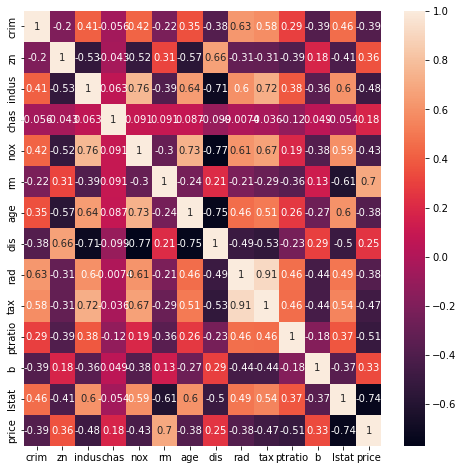

In [249]:
# 상관관계 매트릭스 시각화 
plt.figure( figsize=(8, 8))
sns.heatmap(boston.corr(), annot=True , cbar=True)
plt.show()

In [250]:
#다중 공선성 VIF 구하기 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(boston.values, i) for i in range(boston.shape[1])]
vif["features"] = boston.columns
vif.sort_values('VIF Factor', ascending = False)

,VIF Factor,features
5,136.101743,rm
10,87.227233,ptratio
4,74.004269,nox
9,61.939713,tax
13,24.503206,price
6,21.398863,age
11,21.351015,b
7,15.430455,dis
8,15.369980,rad
2,14.485874,indus


##  $\Sigma$ (시그마) Quiz

### quiz 1) 자전거공유플랫폼 데이터 셋 활용

□ df_bike.csv 파일을 읽고 (데이터 객체명 : df_bike)
train, test로 분리하시오 (random_state=123)

  - sklearn.model_selection / train_test_split 메소드를 쓸 것(데이터셋은 df_bike_train, df_bike_test로 명명)

  1_1. df_bike_train내 대여건수인 'riders' 변수와 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
    <br> 간 pearson 상관계수를 확인, 'riders' 변수와 비교해 가장 상관계수 절대값이 큰 변수를 구하시오

- df_bike_train으로 자건거 대여건수(riders)와 'temp'변수와 단일 회귀분석을 실시하고 

  1_2. 회귀계수를 구하시오

  1_3. df_bike_test의 대여건수를 예측(pred_count)하고, 예측치의 중앙값을 구하시오

  1_4. df_bike_test의 대여건수 예측치(pred_count)와 실제값(riders)의 RMSE를 구하시오

  1_5. df_bike_train의 자건거 대여건수(riders)를 종속변수로 하고, 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
  
    5개 독립변수로 다중 회귀분석을 하고자 한다.
    
    
    이때 해당 모델의 결정계수를 구하고 통계적으로 유의미한 변수와 해당변수의 회귀값을 구하시오  

** bike dataset 설명
https://www.scikit-yb.org/en/latest/api/datasets/bikeshare.html

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# # 데이터 분리 
from sklearn.model_selection import train_test_split
df_bike_train, df_bike_test = train_test_split(df_bike, train_size= 0.7, random_state=123)
print('df', len(df_bike), 'df_bike_train', len(df_bike_train), 'df_bike_test', len(df_bike_test))

df_bike_train[['riders', 'temp', 'feelslike', 'humidity', 'windspeed', 'casual']].corr().abs().sort_values('riders', ascending=False)
# casual, 0.695529

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 1_2. 모델 Training, 회귀계수 (statemodels)

# # OLS 모델, 1_2. 모델 Training, 회귀계수 (statemodels)

# 1_2. 모델 Training, 회귀계수 (sklearn)    
from sklearn.linear_model import LinearRegression

# 1_3. df_bike_test 예측치의 중앙값을 구하시오

# 1_4. df_bike_test pred_count와 count의 RMSE

# 1_5. feature selection


## quiz 2) 다이아몬드 데이터 셋 활용

- diamond.csv 파일을 읽고 (df_dia)
train, test로 분리하시오 (random_state=123) (df_dia_train, df_dia_test)

- df_dia_train으로 선형회귀분석을 실시하고 아래에 답하시오

  2_1. 종속변수(price), 독립변수(carat, depth)일때 독립변수의 회귀계수를 구하시오

  2_2. 종속변수(price), 독립변수(carat, depth, color)일때 df_dia_test price의 예측값 평균을 구하시오

    'color'는 더미변수로 변형하고 가변수를 생성시 마지막 변수 하나를 제거하시오 

  2_3. 2_2 조건으로 df_dia_test의 값이 (carat: 1, color: 'E' , depth: 50)일때 price 예측값을 구하시오 

** dia dataset 설명 https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
# 파일 로딩 
df_dia = pd.read_csv('.\\data\\diamonds.csv')

# 데이터 분리 
from sklearn.model_selection import train_test_split
df_dia_train, df_dia_test = train_test_split(df_dia, train_size= 0.7, random_state=123)
print('df', len(df_dia), 'df_dia_train', len(df_dia_train), 'df_dia_test', len(df_dia_test))
df_dia.head(5)

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 2_1. 모델 Training, 회귀계수 (statemodels)

# 2_1. 모델 Training, 회귀계수 (sklearn)    
# X, y값 세팅

# 2_2. 범주형 data 가변수화  

# 데이터 분리 
from sklearn.model_selection import train_test_split

# X, y값 세팅  ['carat', 'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I'] ['price']

# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression

# 2_2. answer (mean)

# 2_3. 독립변수 직접입력 방식
# df_dia_test(carat: 1, depth: 50, color: 'E'  )일때 price 예측값

# 2_3. answer 


## $\Omega$(오메가) Quiz

- yellowbrick_bikeshare.csv 파일을 읽고 (객체명 : df_bike)

  3-1 season column을 사용하여 여름(df_bike_summer)과 겨울(df_bike_winter)로 구분하시오

  3_2 df_bike_summer, df_bike_winter를  train, test로 분리하시오 (df_summer_tr, df_summer_te, df_winter_tr, df_winter_te, random_state=123 )

  3_3. statemodels를 사용하여 종속변수(riders), 독립변수(temp)로 train 시키고 여름과 겨울의 RMSE차이를 구하시오

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# 3-1 데이터 분리

# 3-2 train, test 분리

from sklearn.model_selection import train_test_split

# 3-3 train, predict
from statsmodels.formula.api import ols


# 3-3 RMSE


In [ ]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

sns.regplot(x='temp', y='riders', data=df_summer_tr, ax= ax[0], color='green')
sns.regplot(x='temp', y='riders', data=df_winter_tr, ax= ax[1])

ax[0].set_title('df_summer_tr')
ax[1].set_title('df_winter_tr')
plt.show()